In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np


In [17]:
df = pd.read_csv('Linear.csv' ,sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [22]:
df.drop('Date',axis=1,inplace=True)
df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


In [23]:
df.isnull().sum()

Starting (USD)    0
Ending (USD)      0
dtype: int64

Text(0.5, 1.0, 'Salary Predict')

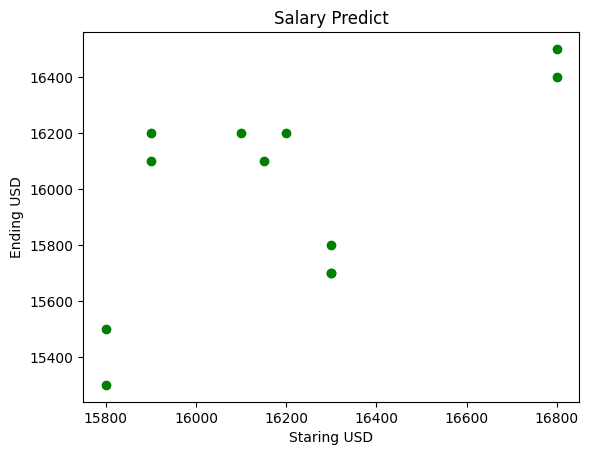

In [65]:
pt.scatter(df['Starting (USD)'],df['Ending (USD)'],color='green')
pt.xlabel('Staring USD')
pt.ylabel('Ending USD')
pt.title('Salary Predict')

In [66]:
x = df[['Starting (USD)']]
x.head(2)

,Starting (USD)
0,16800
1,15900


In [67]:
y= df[['Ending (USD)']]
y.head(2)

,Ending (USD)
0,16500
1,16100


In [73]:
# Linear Regression


In [74]:
x_mean = x.mean()
x_mean

Starting (USD)    16195.833333
dtype: float64

In [75]:
y_mean = y.mean()
y_mean

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'Salary Predict')

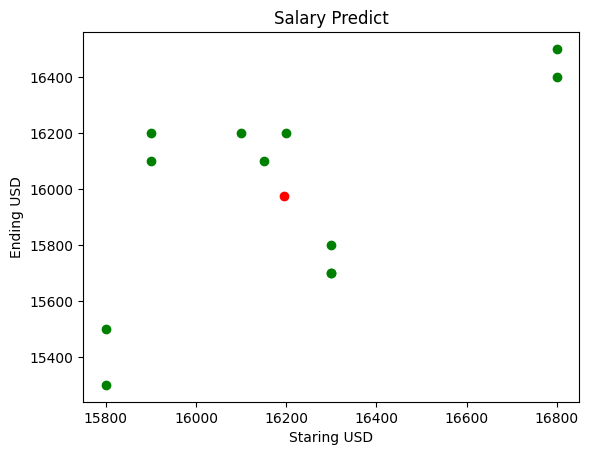

In [76]:
pt.scatter(df['Starting (USD)'],df['Ending (USD)'],color='green')
pt.scatter(x_mean,y_mean,color='red')
pt.plot(x_mean,y_mean,color='red')
pt.xlabel('Staring USD')
pt.ylabel('Ending USD')
pt.title('Salary Predict')

In [77]:
# use Built in Function bt sklearn 

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [78]:
m = reg.coef_
m

array([[0.65258293]])

In [79]:
c = reg.intercept_
c

array([5405.87555702])

In [80]:
y_predict = m*16700 + c
y_predict

array([[16304.0105628]])

In [81]:
# direct predict funtion use kore

y_predict = reg.predict([[16700]])
y_predict

c:\Users\hp432\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [82]:
df['predicted_y'] = reg.predict(x)
df

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


Text(0.5, 1.0, 'Salary Predict')

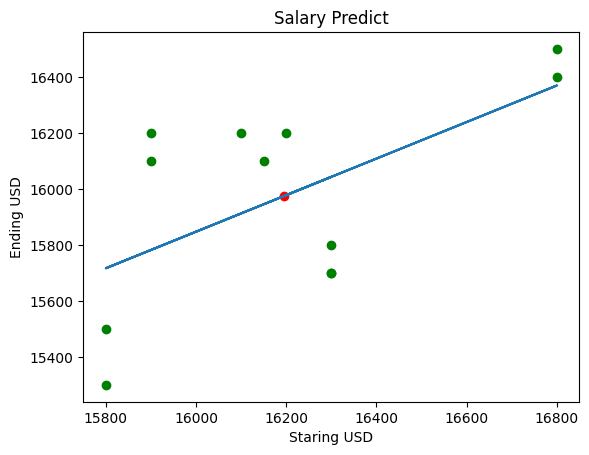

In [84]:

pt.scatter(df['Starting (USD)'],df['Ending (USD)'],color='green')
pt.scatter(x_mean,y_mean,color='red')
pt.plot(x,df['predicted_y'])

pt.xlabel('Staring USD')
pt.ylabel('Ending USD')
pt.title('Salary Predict')


In [116]:
# Lost and Cost Funtion

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [117]:
lose = df['Ending (USD)'] - df['predicted_y']
df['lose']= lose
df

,Starting (USD),Ending (USD),predicted_y,lose
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389
5,16800,16400,16369.268856,30.731144
6,15900,16200,15781.944215,418.055785
7,15800,15500,15716.685922,-216.685922
8,16150,16100,15945.089949,154.910051
9,16300,15800,16042.977389,-242.977389


In [118]:
# use formula
MAE = sum(abs(df['lose']))/len(df['Starting (USD)'])
MAE

260.3840017604666

In [119]:
# use built in function
mae = mean_absolute_error(df['Ending (USD)'],df['predicted_y'])
mae

260.3840017604666

In [120]:
# use formula
MSE = sum((df['lose'])**2)/ len(df['Starting (USD)'])
MSE

80411.23397700388

In [121]:

# use built in function
mse = mean_squared_error (df['Ending (USD)'],df['predicted_y'])
mse

80411.23397700385

In [122]:
# Find R squared value
r2_score(df['Ending (USD)'],df['predicted_y'])

0.3577804940272571